<a href="https://colab.research.google.com/github/iandvecchia/adm01007/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação das Bibliotecas e autorização de acesso ao google drive:

## Dicionário dos Dados: 
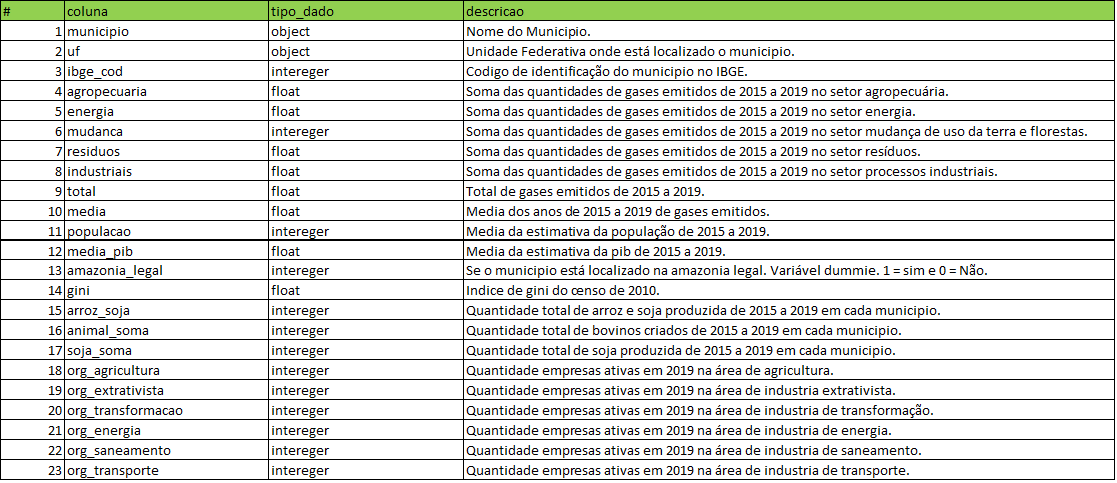

In [229]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sml
from statsmodels import tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format

## 2. Importação da Base de Dados:

In [230]:
df = pd.read_excel('https://raw.githubusercontent.com/iandvecchia/adm01007/data/data_seeg.xlsx')

## 3. Apresentação da Base de Dados:

In [231]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   municipio          5570 non-null   object 
 1   uf                 5570 non-null   object 
 2   ibge_cod           5570 non-null   int64  
 3   agropecuaria       5570 non-null   float64
 4   energia            5570 non-null   float64
 5   mudanca            5570 non-null   int64  
 6   residuos           5570 non-null   float64
 7   industriais        5570 non-null   float64
 8   total              5570 non-null   float64
 9   media              5570 non-null   float64
 10  populacao          5570 non-null   int64  
 11  media_pib          5570 non-null   float64
 12  amazonia_legal     5570 non-null   int64  
 13  gini               5570 non-null   float64
 14  arroz_soja         5570 non-null   int64  
 15  animal_soma        5570 non-null   int64  
 16  soja_soma          5570 

In [232]:
df.describe()



,ibge_cod,agropecuaria,energia,mudanca,residuos,industriais,total,media,populacao,media_pib,amazonia_legal,gini,arroz_soja,animal_soma,soja_soma,org_agricultura,org_extrativista,org_transformacao,org_energia,org_saneamento,org_transporte
count,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000
mean,3253590.771,502526.464,299214.949,199322.002,76788.223,35713.104,1113564.741,222712.948,37841.217,1193675.619,0.139,0.502,55649.101,193341.882,97095.357,18.192,1.929,70.118,0.892,2.249,40.460
std,984910.339,1018912.559,1610390.115,3566277.281,549048.431,741320.561,4645423.345,929084.669,221134.119,11697158.783,0.346,0.066,285419.225,453741.162,410800.423,78.167,6.467,460.958,11.059,12.005,283.585
min,1100015.000,54.529,0.000,-87092164.000,-5229974.397,0.000,-86825629.970,-17365125.994,781.000,13604.477,0.000,0.284,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2512125.750,93281.577,12781.427,-11957.250,10543.747,0.000,157656.083,31531.217,5410.000,79434.673,0.000,0.458,0.000,27858.250,0.000,1.000,0.000,3.000,0.000,0.000,2.000
50%,3146280.000,198577.742,39226.666,20867.500,21428.414,0.000,368734.756,73746.951,11584.000,176295.608,0.000,0.501,143.000,65207.000,0.000,3.000,0.000,11.000,0.000,0.000,7.000
75%,4119189.500,450082.580,140989.768,98139.000,49393.012,0.000,931215.931,186243.186,25387.250,470176.179,0.000,0.545,7260.500,158946.000,23693.250,9.000,2.000,38.000,0.000,1.000,25.000
max,5300108.000,22382972.512,65348156.929,97394819.000,26734316.370,46540144.145,113085488.384,22617097.677,12252023.000,702785457.864,1.000,0.808,6235111.000,11162054.000,10254210.000,2055.000,292.000,28865.000,475.000,660.000,18232.000


In [233]:
total_soma = df['total'].sum()

In [234]:
df.groupby(['ibge_cod', 'municipio'])[['ibge_cod']].count()

,,ibge_cod
ibge_cod,municipio,
1100015,Alta Floresta D'Oeste,1
1100023,Ariquemes,1
1100031,Cabixi,1
1100049,Cacoal,1
1100056,Cerejeiras,1
...,...,...
5222005,Vianópolis,1
5222054,Vicentinópolis,1
5222203,Vila Boa,1


## 3.1 Análise exploratória

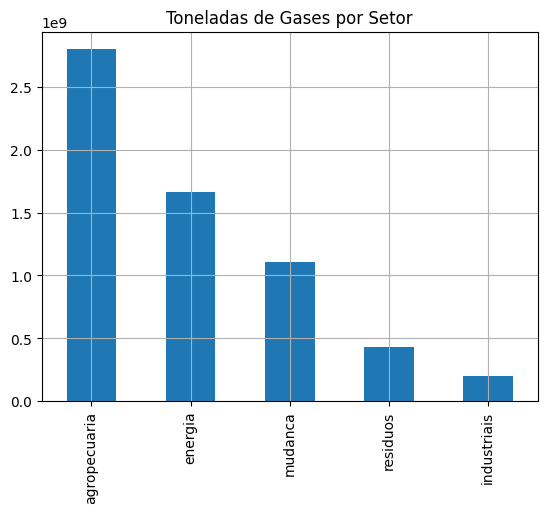

In [235]:
quantidade_por_setor= df[['agropecuaria', 'energia', 'mudanca', 'residuos', 'industriais']].sum() 
ax = quantidade_por_setor.plot(
    kind= 'bar',
    grid=True,
    title='Toneladas de Gases por Setor'
)


Axes(0.125,0.11;0.775x0.77)


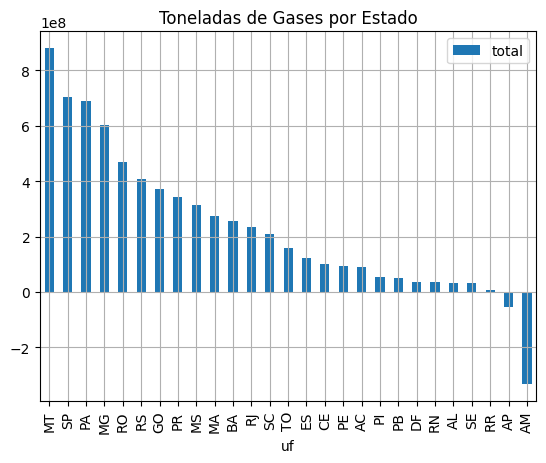

In [236]:
quantidade_por_estado = pd.DataFrame(
    df.groupby(
        by='uf'
    )[['agropecuaria', 'energia', 'mudanca', 'residuos', 'industriais']].sum()
)

quantidade_por_estado['total'] = quantidade_por_estado['agropecuaria'] + quantidade_por_estado['energia'] + quantidade_por_estado['mudanca'] + quantidade_por_estado['residuos'] + quantidade_por_estado['industriais']
quantidade_por_estado = quantidade_por_estado.sort_values(by='total', ascending=False)

ax = quantidade_por_estado[['total']].plot(
    kind= 'bar',
    grid=True,
    title='Toneladas de Gases por Estado'
)
print(ax)

In [237]:
quantidade_por_municipio = pd.DataFrame(
    df.groupby(
        by=['municipio', 'uf']
    )[['agropecuaria', 'energia', 'mudanca', 'residuos', 'industriais']].sum()
)

quantidade_por_municipio['total'] = quantidade_por_municipio['agropecuaria'] + quantidade_por_municipio['energia'] + quantidade_por_municipio['mudanca'] + quantidade_por_municipio['residuos'] + quantidade_por_municipio['industriais']

print(quantidade_por_municipio.sort_values(by='total', ascending=False).head(10))

                       agropecuaria      energia   mudanca     residuos  \
municipio          uf                                                     
Porto Velho        RO  10043555.371  4735711.340  97394819   911402.674   
São Paulo          SP     26930.872 65348156.929    115411 21319447.541   
São Félix do Xingu PA  22382972.512   340372.505  49488928   171350.200   
Rio de Janeiro     RJ    118008.888 32904622.278     56023 26734316.370   
Pacajá             PA   6008032.966   106254.463  53952265    54928.003   
Nova Mamoré        RO   6540440.304   204341.896  46406203    53070.683   
Colniza            MT   5636428.330   303269.916  46850841    45893.433   
Serra              ES    191614.637  3800875.810     75448  1455179.067   
Novo Repartimento  PA   9392060.911   248733.887  37455770   105997.399   
Lábrea             AM   3199371.616   125965.244  39594741   105379.455   

                       industriais         total  
municipio          uf                           

Axes(0.125,0.11;0.775x0.77)


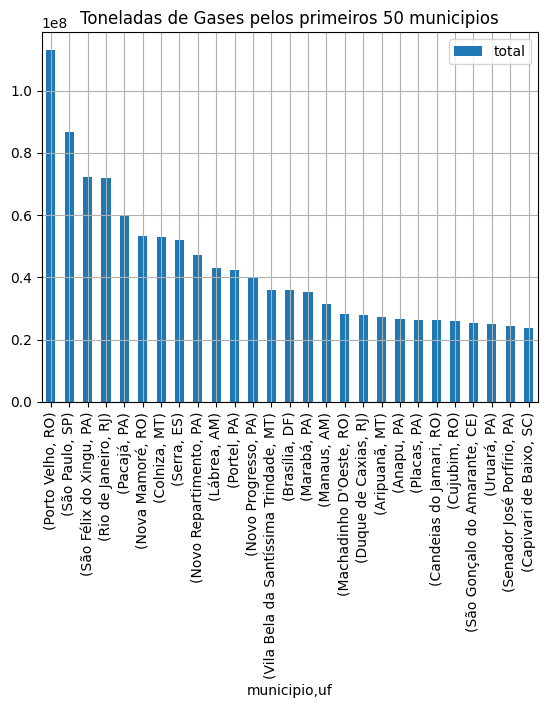

In [238]:
quantidade_por_municipio = quantidade_por_municipio.sort_values(by='total', ascending=False).head(27)
ax = quantidade_por_municipio[['total']].plot(
    kind= 'bar',
    grid=True,
    title='Toneladas de Gases pelos primeiros 50 municipios'
)

print(ax)

## 4. Correlação de Pearson:

In [239]:
df.corr(method='pearson')

,ibge_cod,agropecuaria,energia,mudanca,residuos,industriais,total,media,populacao,media_pib,amazonia_legal,gini,arroz_soja,animal_soma,soja_soma,org_agricultura,org_extrativista,org_transformacao,org_energia,org_saneamento,org_transporte
ibge_cod,1.000,0.168,0.023,0.012,0.004,0.003,0.055,0.055,-0.001,0.017,-0.146,-0.372,0.176,0.107,0.249,0.078,0.051,0.055,0.015,0.056,0.060
agropecuaria,0.168,1.000,0.039,0.325,0.022,-0.011,0.483,0.483,0.018,0.006,0.110,0.159,0.270,0.964,0.346,0.056,0.095,0.004,-0.003,0.022,0.023
energia,0.023,0.039,1.000,0.011,0.690,0.149,0.469,0.469,0.777,0.045,-0.014,0.071,0.023,0.025,0.044,0.174,0.476,0.711,0.604,0.779,0.733
mudanca,0.012,0.325,0.011,1.000,0.006,-0.002,0.843,0.843,0.011,-0.000,0.053,-0.004,0.068,0.353,0.078,0.005,0.032,0.004,0.002,0.011,0.002
residuos,0.004,0.022,0.690,0.006,1.000,0.206,0.399,0.399,0.907,0.038,-0.005,0.095,0.004,0.015,0.012,0.164,0.666,0.762,0.830,0.837,0.773
industriais,0.003,-0.011,0.149,-0.002,0.206,1.000,0.231,0.231,0.151,0.003,-0.013,0.008,-0.009,-0.010,-0.007,0.009,0.220,0.088,0.149,0.146,0.091
total,0.055,0.483,0.469,0.843,0.399,0.231,1.000,1.000,0.413,0.022,0.057,0.069,0.118,0.491,0.151,0.097,0.324,0.355,0.332,0.406,0.367
media,0.055,0.483,0.469,0.843,0.399,0.231,1.000,1.000,0.413,0.022,0.057,0.069,0.118,0.491,0.151,0.097,0.324,0.355,0.332,0.406,0.367
populacao,-0.001,0.018,0.777,0.011,0.907,0.151,0.413,0.413,1.000,0.040,-0.009,0.107,0.002,0.011,0.010,0.187,0.575,0.916,0.830,0.949,0.924
media_pib,0.017,0.006,0.045,-0.000,0.038,0.003,0.022,0.022,0.040,1.000,-0.017,0.005,0.003,0.006,0.000,0.015,0.027,0.043,0.035,0.048,0.037


In [240]:
df.drop(columns=['media_pib', 'amazonia_legal', 'gini'])

,municipio,uf,ibge_cod,agropecuaria,energia,mudanca,residuos,industriais,total,media,populacao,arroz_soja,animal_soma,soja_soma,org_agricultura,org_extrativista,org_transformacao,org_energia,org_saneamento,org_transporte
0,Abadia de Goiás,GO,5200050,182059.811,24109.826,9260,14761.242,0.000,230190.879,46038.176,8773,378,85524,2936,4,0,74,0,4,27
1,Abadia dos Dourados,MG,3100104,651129.889,35262.553,-6375,27595.828,0.000,707613.269,141522.654,6989,4341,294216,43382,2,7,27,1,1,54
2,Abadiânia,GO,5200100,630704.363,224335.639,79132,35296.036,0.000,969468.038,193893.608,20042,12649,271240,126409,13,9,24,0,3,9
3,Abaeté,MG,3100203,1123977.631,106487.511,6180,98284.347,0.000,1334929.489,266985.898,23237,7637,518689,7613,31,1,32,1,2,64
4,Abaetetuba,PA,1500107,127900.682,316338.028,169566,209062.941,0.000,822867.651,164573.530,157698,12,30194,0,13,3,51,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,Xique-Xique,BA,2933604,321186.540,47495.339,-237897,73145.745,0.000,203930.625,40786.125,46483,0,121845,0,4,2,14,0,1,7
5566,Zabelê,PB,2517407,35864.073,3238.816,910,3288.291,0.000,43301.180,8660.236,2240,0,8475,0,0,0,2,0,0,0
5567,Zacarias,SP,3557154,227686.808,4832.955,34945,8187.441,0.000,275652.203,55130.441,2718,66,75541,6600,69,1,6,0,0,3
5568,Zé Doca,MA,2114007,1313424.963,142839.816,143401,77117.503,0.000,1676783.282,335356.656,51714,6697,651629,0,2,0,16,0,0,4


<Axes: >

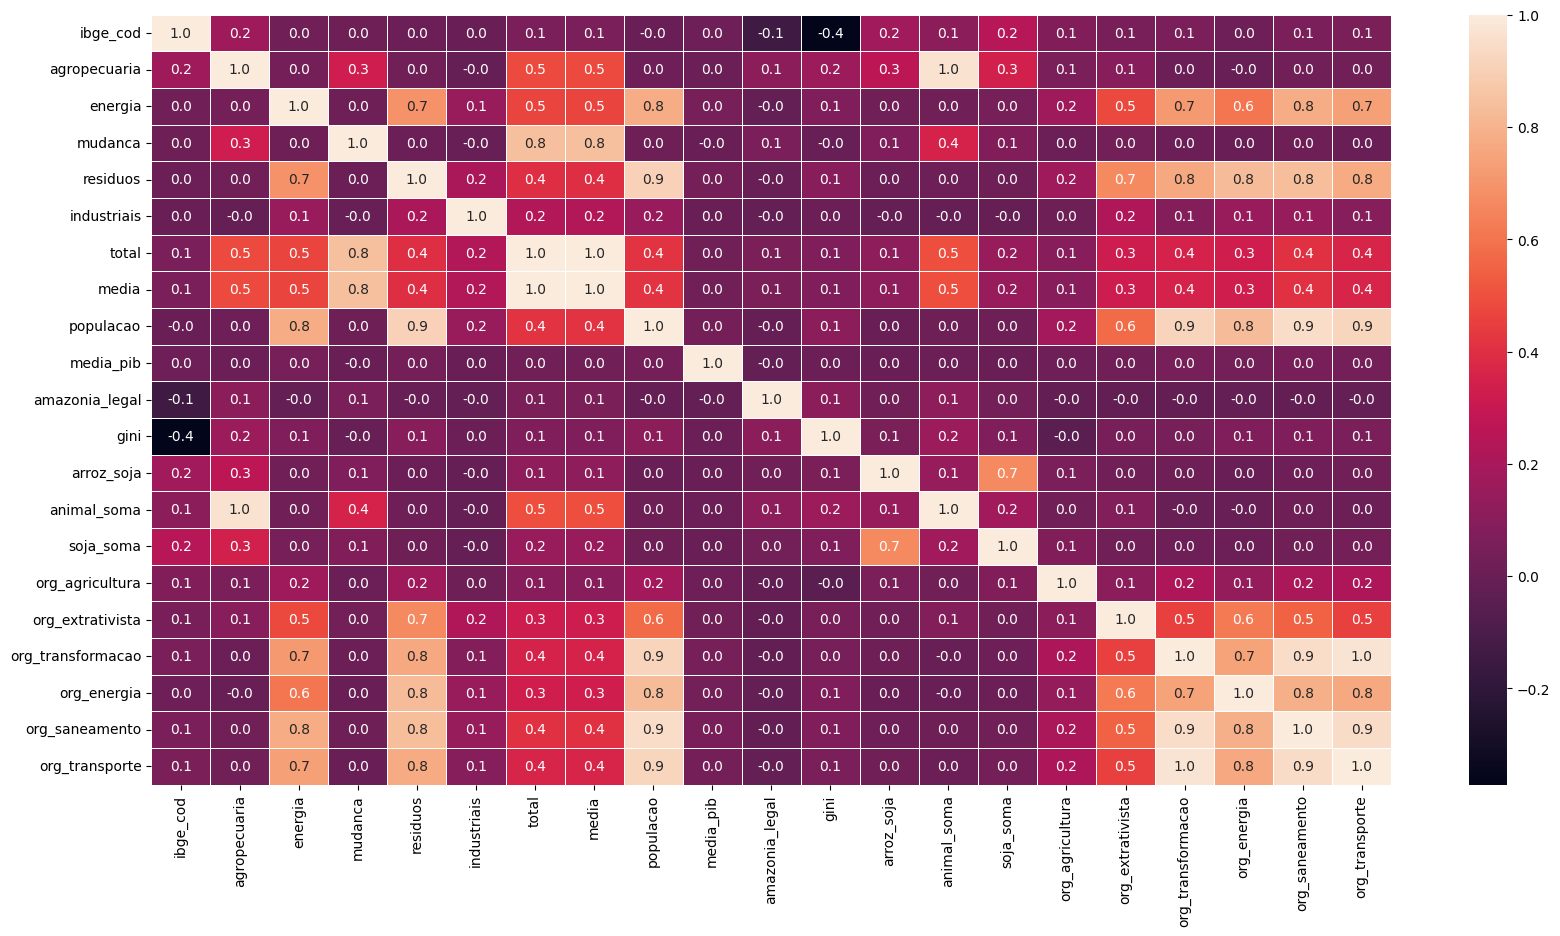

In [241]:
plt.subplots(figsize=(20,10))
correlacao = df.corr()
sns.heatmap(correlacao, annot=True, fmt='.1f', linewidth=.5)

# 5. Construção de Modelos:


  ## 5.1: Seleção de variáveis para setor de Agropecuária;

In [242]:
x = df[['animal_soma', 'soja_soma']]
y = df['agropecuaria']

regressor_OLS = sml.OLS(endog = y,exog =  x).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           agropecuaria   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          8.074e+04
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:54:07   Log-Likelihood:                         -76094.
No. Observations:                5570   AIC:                                  1.522e+05
Df Residuals:                    5568   BIC:                                  1.522e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
animal_soma     2.1324      0.006    366.383      0.000       2.121       2.144
soja_soma       0.4649      0.007     68.359      0.000       0.452       0.478
==============================================================================
Omnibus:                     8611.868   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7014207.422
Skew:                           9.534   Prob(JB):                         0.00
Kurtosis:                     175.798   Cond. No.                         1.35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###**Interpretações sobre os resultados:** 
  O P value indica que a quantidade de bovinos é estatisticamente significante com relação a quantidade de gases emitidos para o setor agropecuário. 

##   5.2: Seleção de variáveis para setor de Energia

In [243]:
x = df[['org_transporte', 'populacao', 'org_transformacao', 'org_energia', 'org_saneamento']]
y = df[['energia']]

regressor_OLS = sml.OLS(endog = y,exog =  x).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                energia   R-squared (uncentered):                   0.652
Model:                            OLS   Adj. R-squared (uncentered):              0.652
Method:                 Least Squares   F-statistic:                              2086.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:54:07   Log-Likelihood:                         -84663.
No. Observations:                5570   AIC:                                  1.693e+05
Df Residuals:                    5565   BIC:                                  1.694e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
org_transporte     1271.0009    200.389      6.343      0.000     878.160    1663.842
populacao             3.9050      0.212     18.395      0.000       3.489       4.321
org_transformacao -1787.1244    124.396    -14.366      0.000   -2030.989   -1543.259
org_energia       -2.282e+04   2102.188    -10.853      0.000   -2.69e+04   -1.87e+04
org_saneamento     9.004e+04   4391.894     20.502      0.000    8.14e+04    9.87e+04
==============================================================================
Omnibus:                    10732.924   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20934367.971
Skew:                          15.056   Prob(JB):                         0.00
Kurtosis:                     301.823   Cond. No.                     7.61e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###**Interpretações sobre os resultados:** 
  O P value indica que a quantidade de população, organizações de transporte, transformação, energia e saneamento são estatisticamente significantes com relação a quantidade de gases emitidos para o setor de energia.
  
  A relação das variaveis: transporte, população e saneamento é positiva. Enquanto as variáveis transformação e saneamento possuem uma relação negativa com relação a quantidade de gases emitidos no setor em questão. 

## 5.3: Seleção de variáveis para o setor de Resíduos

In [244]:
x = df[['populacao', 'org_extrativista', 'org_transformacao', 'org_energia', 'org_saneamento', 'org_transporte']]
y = df[['residuos']]

regressor_OLS = sml.OLS(endog = y,exog =  x).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residuos   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              7061.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:54:07   Log-Likelihood:                         -75572.
No. Observations:                5570   AIC:                                  1.512e+05
Df Residuals:                    5564   BIC:                                  1.512e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
populacao             2.4986      0.042     59.461      0.000       2.416       2.581
org_extrativista   9715.9858    514.235     18.894      0.000    8707.884    1.07e+04
org_transformacao  -262.8894     24.374    -10.785      0.000    -310.673    -215.106
org_energia        9692.3451    429.647     22.559      0.000    8850.068    1.05e+04
org_saneamento     4485.8490    880.715      5.093      0.000    2759.304    6212.394
org_transporte     -469.5972     40.022    -11.734      0.000    -548.055    -391.139
==============================================================================
Omnibus:                     6080.045   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25180474.205
Skew:                          -4.216   Prob(JB):                         0.00
Kurtosis:                     332.282   Cond. No.                     7.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Interpretações sobre os resultados:** 
  O P value indica que a quantidade de população, organizações extrativistas, transformação, energia e saneamento e transporte são estatisticamente significantes com relação a quantidade de gases emitidos para o setor de residuos.
  
  A relação das variaveis: população, extrativista, energia e saneamento é positiva. Enquanto as variáveis transformação e transporte possuem uma relação negativa com relação a quantidade de gases emitidos no setor em questão. 

# 6. Rodando os modelos: 




## 6.1: Modelos para o setor de agropecuária: 
Previsão para o setor de agropecuária utilizando as variáveis de quantidade de cabeças de gado e produção de soja

In [245]:
x = df[['animal_soma', 'soja_soma']]
y = df['agropecuaria']

#x= np.array(x).reshape(-1, 1)
#y= np.array(y).reshape(-1, 1)

In [246]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state=10)

### Regressão Linear Múltipla:

54219.26869379508 [2.09360506 0.41836269]
R2 DE TREINO: 0.9590857398183843
MAE DE TREINO: 75868.31633243302
R2 DE TESTE: 0.9620084769694558
MAE DE TESTE: 76901.00370264285


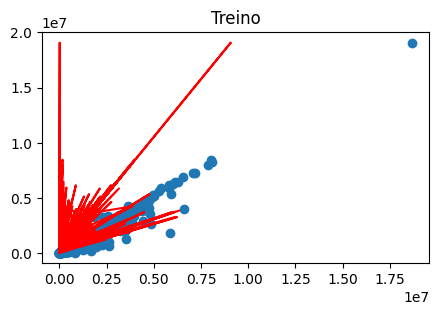

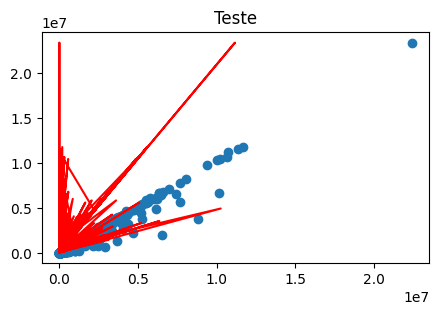

In [247]:
lr = LinearRegression()
lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_

print(c, m)

y_pred_train = lr.predict(x_train)



plt.subplots(figsize=(5,3))
#plt.scatter(x_train, y_train)
plt.scatter(y_train, y_pred_train)
plt.title('Treino')
plt.plot(x_train, y_pred_train, color='red')
print("R2 DE TREINO:", r2_score(y_train, y_pred_train))
print("MAE DE TREINO:", mean_absolute_error(y_train, y_pred_train))

plt.subplots(figsize=(5,3))
y_pred_test = lr.predict(x_test)
y_pred_test
plt.title('Teste')
#plt.scatter(x_test, y_test)
plt.scatter(y_test, y_pred_test)
plt.plot(x_test, y_pred_test, color='red')
print("R2 DE TESTE:", r2_score(y_test, y_pred_test))
print("MAE DE TESTE:", mean_absolute_error(y_test, y_pred_test))

#Adicionando os dados previstos para cada municipio na base:
previsao_agro = lr.predict(x)
df['previsao_agro'] = previsao_agro


### Ridge Regression: 

In [248]:
reg = linear_model.Ridge(alpha = 0.5)
reg.fit(x_train, y_train)
yhat_reg_train = reg.predict(x_train)
yhat_reg_test = reg.predict(x_test)
r2_train_score = r2_score(y_train, yhat_reg_train)
mae_treino = mean_absolute_error(y_train, yhat_reg_train)


r2_test_score = r2_score(y_test, yhat_reg_test)
mae_teste = mean_absolute_error(y_test, yhat_reg_test)

print("R2 DE TREINO:", r2_train_score)
print("MAE DE TREINO:", mae_treino)

print("R2 DE TESTE:", r2_test_score)
print("MAE DE TESTE:", mae_teste)

R2 DE TREINO: 0.9590857398183843
MAE DE TREINO: 75868.31633243304
R2 DE TESTE: 0.9620084769694558
MAE DE TESTE: 76901.00370264285


### Lasso Regression: 

In [249]:
lasso = linear_model.Lasso(alpha = 0.5)
lasso.fit(x_train, y_train)
yhat_reg_train = lasso.predict(x_train)
yhat_reg_test = lasso.predict(x_test)
r2_train_score = r2_score(y_train, yhat_reg_train)
r2_test_score = r2_score(y_test, yhat_reg_test)

print("R2 DE TREINO:", r2_train_score)
print("MAE DE TREINO:", mae_treino)

print("R2 DE TESTE:", r2_test_score)
print("MAE DE TESTE:", mae_teste)

R2 DE TREINO: 0.9590857398183843
MAE DE TREINO: 75868.31633243304
R2 DE TESTE: 0.962008476969414
MAE DE TESTE: 76901.00370264285


## 6.2 Modelos para o setor de energia: 
Previsão para o setor de energia utilizando as variáveis populacao, org_transformacao, org_energia, org_saneamento e org_transporte. 


In [250]:
x = df[['org_transporte', 'populacao', 'org_transformacao', 'org_energia', 'org_saneamento']]
y = df[['energia']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

### Regressão Linear Múltipla:

[57323.3555245] [[ 1.08866096e+03  4.02794323e+00 -1.81755911e+03 -2.52113387e+04
   9.48606289e+04]]
R2 DE TREINO: 0.6370243195658736
MAE DE TREINO: 264048.68266352714
R2 DE TESTE: 0.6726090991416771
MAE DE TESTE: 201239.60678764127


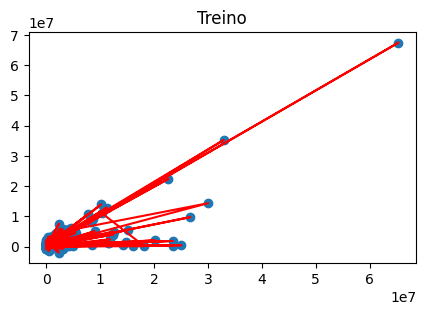

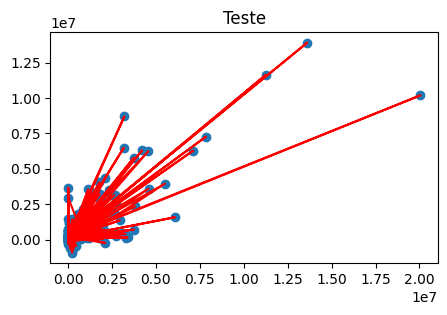

In [251]:

lr = LinearRegression()
lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_
plt.subplots(figsize=(5,3))
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

plt.plot(y_train, y_pred_train, color='red')
plt.title('Treino')
plt.scatter(y_train, y_pred_train)
print(c, m)

plt.subplots(figsize=(5,3))
r2_score(y_train, y_pred_train)


plt.scatter(y_test, y_pred_test)
plt.title('Teste')
plt.plot(y_test, y_pred_test, color='red')

print("R2 DE TREINO:", r2_score(y_train, y_pred_train))
print("MAE DE TREINO:", mean_absolute_error(y_train, y_pred_train))

print("R2 DE TESTE:", r2_score(y_test, y_pred_test))
print("MAE DE TESTE:", mean_absolute_error(y_test, y_pred_test))

#Adicionando os dados previstos para cada municipio na base:
previsao_energia = lr.predict(x)
df['previsao_energia'] = previsao_energia




### Ridge Regression: 

In [252]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = 0.5)
reg.fit(x_train, y_train)
yhat_reg_train = reg.predict(x_train)
yhat_reg_test = reg.predict(x_test)
r2_train_score = r2_score(y_train, yhat_reg_train)
r2_test_score = r2_score(y_test, yhat_reg_test)

print("R2 DE TREINO:", r2_train_score)
print("MAE DE TREINO:", mae_treino)

print("R2 DE TESTE:", r2_test_score)
print("MAE DE TESTE:", mae_teste)

R2 DE TREINO: 0.6370243195604246
MAE DE TREINO: 75868.31633243304
R2 DE TESTE: 0.672609917923775
MAE DE TESTE: 76901.00370264285


### Lasso Regression:

In [253]:
 
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 0.8)
lasso.fit(x_train, y_train)
yhat_reg_train = reg.predict(x_train)
yhat_reg_test = reg.predict(x_test)
r2_train_score = r2_score(y_train, yhat_reg_train)
r2_test_score = r2_score(y_test, yhat_reg_test)

print("R2 DE TREINO:", r2_train_score)
print("MAE DE TREINO:", mae_treino)

print("R2 DE TESTE:", r2_test_score)
print("MAE DE TESTE:", mae_teste)

R2 DE TREINO: 0.6370243195604246
MAE DE TREINO: 75868.31633243304
R2 DE TESTE: 0.672609917923775
MAE DE TESTE: 76901.00370264285


## 6.3 Modelo de Regressão Linear Multipla: 
Previsão para o setor de resíduos utilizando as variáveis populacao, org_extrativista, org_transformacao, org_energia, org_saneamento e org_transporte

In [254]:
x = df[['populacao', 'org_extrativista', 'org_transformacao', 'org_energia', 'org_saneamento', 'org_transporte']]
y = df[['residuos']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=5570)

### Regressão Linear Múltipla

R2 DE TREINO: 0.748044569626411
MAE DE TREINO: 29466.493712915584
R2 DE TESTE: 0.8300575822497521
MAE DE TESTE: 36982.34992334446


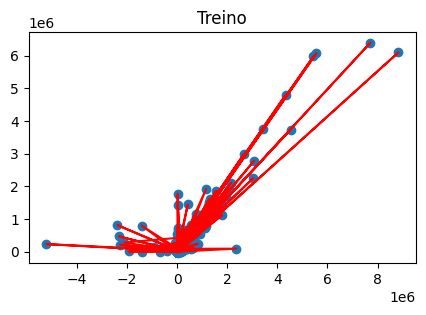

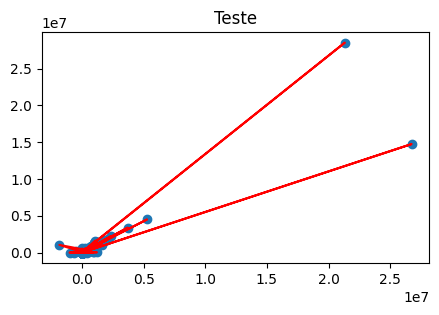

In [255]:

lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_

y_pred_train = lr.predict(x_train)
plt.subplots(figsize=(5,3))

plt.plot(y_train, y_pred_train, color='red')
plt.title('Treino')
plt.scatter(y_train, y_pred_train)




r2_score(y_train, y_pred_train)

y_pred_test = lr.predict(x_test)
plt.subplots(figsize=(5,3))

plt.scatter(y_test, y_pred_test)
plt.title('Teste')
plt.plot(y_test, y_pred_test, color='red')

print("R2 DE TREINO:", r2_score(y_train, y_pred_train))
print("MAE DE TREINO:", mean_absolute_error(y_train, y_pred_train))

print("R2 DE TESTE:", r2_score(y_test, y_pred_test))
print("MAE DE TESTE:", mean_absolute_error(y_test, y_pred_test))

previsao_residuos = lr.predict(x)
df['previsao_residuos'] = previsao_residuos

### Ridge Regression: 

In [256]:
reg = linear_model.Ridge(alpha = 0.5)
reg.fit(x_train, y_train)
yhat_reg_train = reg.predict(x_train)
yhat_reg_test = reg.predict(x_test)
r2_train_score = r2_score(y_train, yhat_reg_train)
r2_test_score = r2_score(y_test, yhat_reg_test)

print("R2 DE TREINO:", r2_train_score)
print("MAE DE TREINO:", mae_treino)

print("R2 DE TESTE:", r2_test_score)
print("MAE DE TESTE:", mae_teste)

R2 DE TREINO: 0.7480445696263799
MAE DE TREINO: 75868.31633243304
R2 DE TESTE: 0.8300575814718256
MAE DE TESTE: 76901.00370264285


### Lasso Regression: 

In [257]:
lasso = linear_model.Lasso(alpha = 0.5)
lasso.fit(x_train, y_train)
yhat_reg_train = reg.predict(x_train)
yhat_reg_test = reg.predict(x_test)
r2_train_score = r2_score(y_train, yhat_reg_train)
r2_test_score = r2_score(y_test, yhat_reg_test)

print("R2 DE TREINO:", r2_train_score)
print("MAE DE TREINO:", mae_treino)

print("R2 DE TESTE:", r2_test_score)
print("MAE DE TESTE:", mae_teste)

R2 DE TREINO: 0.7480445696263799
MAE DE TREINO: 75868.31633243304
R2 DE TESTE: 0.8300575814718256
MAE DE TESTE: 76901.00370264285


## 7. Verificando os resultado de previsão para os setores economicos:
  Após adicionar os dados de previsão na base para cada municipio de cada setor economico, apresentamos agora a listagem dos municipios que tem maior previsão de emissão de acordo com cada setor: 
  


 ### 7.1: Setor Agropecuária

In [258]:
print(df[['municipio', 'uf', 'previsao_agro']].sort_values(by='previsao_agro', ascending=False,).head(10))

                             municipio  uf  previsao_agro
4635                São Félix do Xingu  PA   23424216.293
1423                           Corumbá  MS   19072286.579
4160                Ribas do Rio Pardo  MS   11801836.419
838                            Cáceres  MT   11578960.690
2911                            Marabá  PA   11233255.737
5503  Vila Bela da Santíssima Trindade  MT   10704117.396
2618                             Juara  MT   10474682.081
3977                       Porto Velho  RO   10350995.746
3418                 Novo Repartimento  PA    9801108.576
1498                   Cumaru do Norte  PA    8468095.628


 ### 7.2: Setor Energia

In [259]:
print(df[['municipio', 'uf', 'previsao_energia']].sort_values(by='previsao_energia', ascending=False).head(10))

           municipio  uf  previsao_energia
4853       São Paulo  SP      67425028.371
4207  Rio de Janeiro  RJ      35198514.646
755         Brasília  DF      22394350.477
2885          Manaus  AM      14331177.355
4332        Salvador  BA      13908562.836
2036       Guarulhos  SP      13904539.378
1508        Curitiba  PR      12880022.078
1831       Fortaleza  CE      11624015.152
592   Belo Horizonte  MG      10999296.487
1927         Goiânia  GO      10678134.411


  ### 7.3: Setor de Residuos

In [260]:
print(df[['municipio', 'uf', 'previsao_residuos']].sort_values(by='previsao_residuos', ascending=False).head(10))

           municipio  uf  previsao_residuos
4853       São Paulo  SP       28547163.400
4207  Rio de Janeiro  RJ       14751754.675
755         Brasília  DF        6399557.228
1831       Fortaleza  CE        6101126.528
4332        Salvador  BA        6076653.524
592   Belo Horizonte  MG        5977608.958
1508        Curitiba  PR        4795661.272
2885          Manaus  AM        4501717.221
1927         Goiânia  GO        3741430.398
4110          Recife  PE        3738617.326


In [261]:
#Exportando a base de dados produzida a partir da previsão para cada setor: 
df[['municipio', 'uf', 'previsao_agro', 'previsao_energia', 'previsao_residuos']].to_excel('dados_previsao2.xlsx')
